# K線型態哪種最有用？

## 取得價格資料、計算獲利

In [1]:
from finlab.data import Data

data = Data()
open_adj = data.get_adj('開盤價')

profit1 =  open_adj.shift(-2) / open_adj.shift(-1)
profit5 =  open_adj.shift(-6) / open_adj.shift(-1)
profit10 = open_adj.shift(-11) / open_adj.shift(-1)
profit60 = open_adj.shift(-61) / open_adj.shift(-1)

profit1 = profit1.unstack()
profit5 = profit5.unstack()
profit10 = profit10.unstack()
profit60 = profit60.unstack()

## 計算K線型態

In [2]:
df = data.talib('CDL2CROWS')
df = df.unstack()

profit10[df < 0].mean()

1.005748052516898

## 計算每一種K線型態的獲利

In [3]:
results = {}
counts = {}
from talib import abstract

for fname in [fname for fname in dir(abstract) if fname[:3] == 'CDL']:
    df = data.talib(fname)
    df = df.unstack()
    pos = df > 0
    neg = df < 0
    
    results['NEG_' + fname] = {
        'profit1': profit1 [neg].mean(),
        'profit5': profit5 [neg].mean(),
        'profit10':profit10[neg].mean(),
        'profit60':profit60[neg].mean(),
        'count': sum(neg),
    }
    results['POS_' + fname] = {
        'profit1': profit1 [pos].mean(),
        'profit5': profit5 [pos].mean(),
        'profit10':profit10[pos].mean(),
        'profit60':profit60[pos].mean(),
        'count': sum(pos),
    }
    print(fname)
    

CDL2CROWS
CDL3BLACKCROWS
CDL3INSIDE
CDL3LINESTRIKE
CDL3OUTSIDE
CDL3STARSINSOUTH
CDL3WHITESOLDIERS
CDLABANDONEDBABY
CDLADVANCEBLOCK
CDLBELTHOLD
CDLBREAKAWAY
CDLCLOSINGMARUBOZU
CDLCONCEALBABYSWALL
CDLCOUNTERATTACK
CDLDARKCLOUDCOVER
CDLDOJI
CDLDOJISTAR
CDLDRAGONFLYDOJI
CDLENGULFING
CDLEVENINGDOJISTAR
CDLEVENINGSTAR
CDLGAPSIDESIDEWHITE
CDLGRAVESTONEDOJI
CDLHAMMER
CDLHANGINGMAN
CDLHARAMI
CDLHARAMICROSS
CDLHIGHWAVE
CDLHIKKAKE
CDLHIKKAKEMOD
CDLHOMINGPIGEON
CDLIDENTICAL3CROWS
CDLINNECK
CDLINVERTEDHAMMER
CDLKICKING
CDLKICKINGBYLENGTH
CDLLADDERBOTTOM
CDLLONGLEGGEDDOJI
CDLLONGLINE
CDLMARUBOZU
CDLMATCHINGLOW
CDLMATHOLD
CDLMORNINGDOJISTAR
CDLMORNINGSTAR
CDLONNECK
CDLPIERCING
CDLRICKSHAWMAN
CDLRISEFALL3METHODS
CDLSEPARATINGLINES
CDLSHOOTINGSTAR
CDLSHORTLINE
CDLSPINNINGTOP
CDLSTALLEDPATTERN
CDLSTICKSANDWICH
CDLTAKURI
CDLTASUKIGAP
CDLTHRUSTING
CDLTRISTAR
CDLUNIQUE3RIVER
CDLUPSIDEGAP2CROWS
CDLXSIDEGAP3METHODS


## 哪一種蠟燭型態最好？

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,9)

df_result = pd.DataFrame(results).transpose()

profit_names = ['profit1', 'profit5', 'profit10', 'profit60']
df = pd.DataFrame({name:df_result[name] for name in profit_names}).dropna()
df.sort_values('profit10')

,profit1,profit5,profit10,profit60
POS_CDLABANDONEDBABY,0.996134,0.992163,0.991472,0.998888
NEG_CDLRISEFALL3METHODS,0.997655,0.987382,0.994039,1.008464
POS_CDLCONCEALBABYSWALL,1.000732,0.973869,0.994607,0.966951
NEG_CDL3LINESTRIKE,0.997888,0.999457,0.997170,0.993191
POS_CDLTASUKIGAP,1.000451,0.994522,0.997625,1.025267
...,...,...,...,...
POS_CDLTRISTAR,1.001415,1.003374,1.009589,1.054125
NEG_CDLEVENINGDOJISTAR,1.001248,1.004424,1.009913,1.031443
POS_CDLKICKING,1.004683,1.011406,1.011078,1.035523
NEG_CDLTASUKIGAP,1.002676,1.007439,1.011669,1.038623


## 蠟燭型態歷史資料繪製

In [6]:
# 開高低收成交量
high = data.get("最高價")
low = data.get("最低價")
open_ = data.get("開盤價")
close = data.get("收盤價")
volume = data.get("成交股數")

# 找到蠟燭型態
df = data.talib("CDLTRISTAR")
signals = (df > 0) & (volume.rolling(10).mean() > 100000)
signals = signals.unstack()
signals = signals[signals > 0]
signals.index = signals.index.set_names(['stock_id', 'date'])
signals = signals.reset_index()

,open,high,close,low,volume
date,,,,,
2019-07-31,18.50,18.50,18.38,18.30,512952.0
2019-08-01,18.29,18.30,18.14,18.10,753678.0
2019-08-02,17.96,17.96,17.83,17.76,1182821.0
2019-08-05,17.81,17.81,17.50,17.50,745420.0
2019-08-06,17.38,17.38,17.26,17.00,1511228.0
2019-08-07,17.30,17.38,17.17,17.16,410790.0
2019-08-08,17.20,17.30,17.24,17.12,738632.0
2019-08-12,17.20,17.30,17.21,17.10,433199.0
2019-08-13,17.13,17.25,17.12,17.12,422200.0


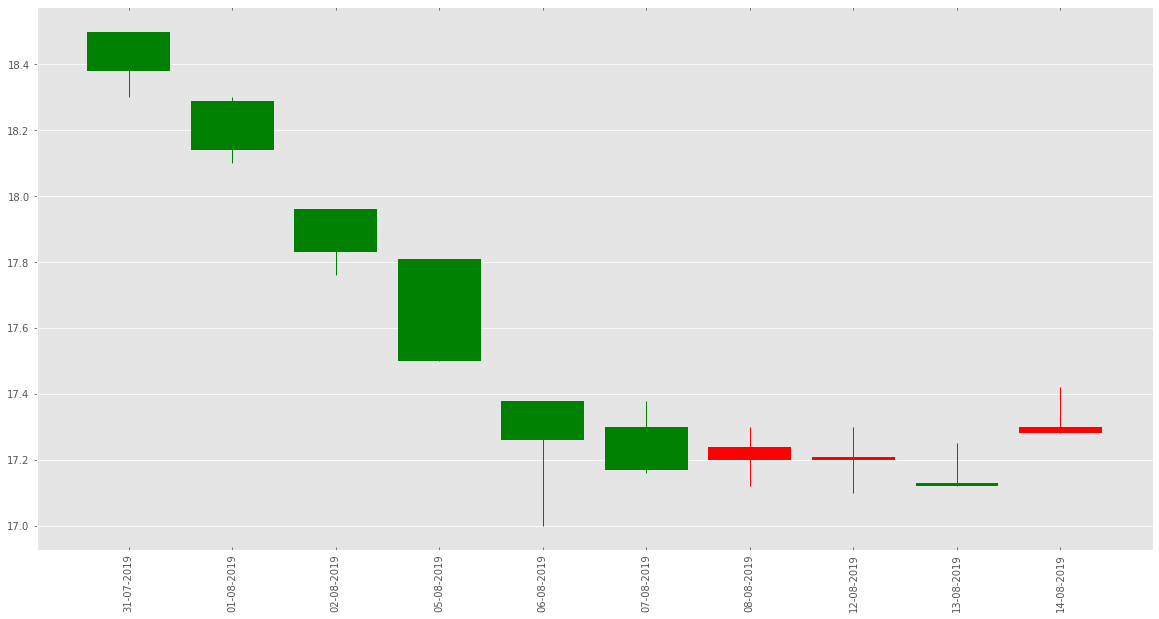

In [7]:

ind = 6
stock_id = signals['stock_id'].iloc[ind]
date = signals['date'].iloc[ind]

import matplotlib.pyplot as plt

o = open_[stock_id].loc[:date].tail(10)
h = high[stock_id].loc[:date].tail(10)
l = low[stock_id].loc[:date].tail(10)
c = close[stock_id].loc[:date].tail(10)
v = volume[stock_id].loc[:date].tail(10)

df = pd.DataFrame({'open':o, 'high':h, 'close':c, 'low':l, 'volume':v}).dropna(how='all')

from finlab.plot_candles import plot_candles
plot_candles(start_time=o.index[0], end_time=o.index[-1], pricing=df,)

df